<a href="https://colab.research.google.com/github/yugminichavan/NLP_practice/blob/main/number_plate_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. check version of CUDA present in our systems

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


2.Installing and importing the required packages

In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 49.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

3. convert color image into gray scale image

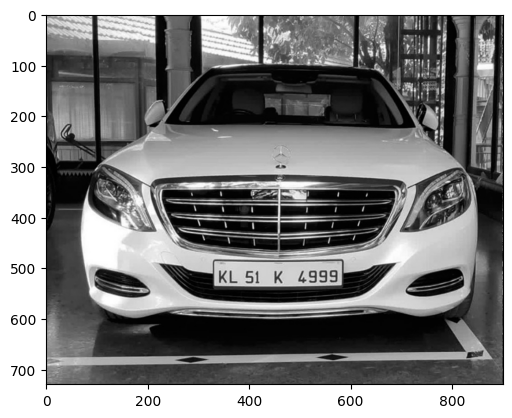

In [ ]:
img=cv2.imread('/content/car_4.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


4. apply filter and edge detection

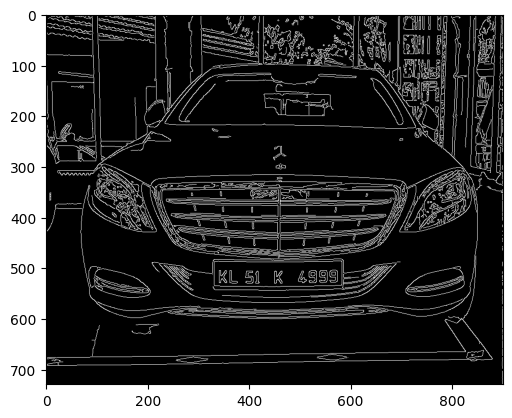

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

5. find contours and apply mask

In [ ]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [ ]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break


In [ ]:
location

array([[[331, 489]],

       [[332, 535]],

       [[583, 533]],

       [[582, 486]]], dtype=int32)

In [ ]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

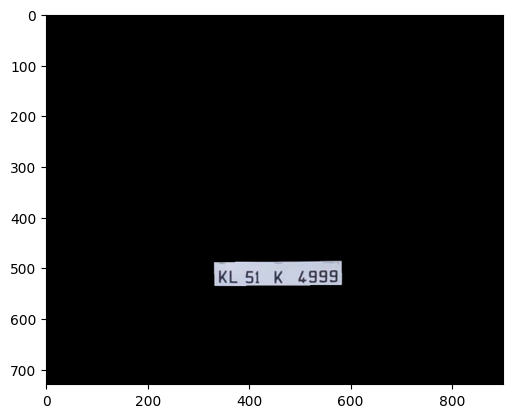

In [ ]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

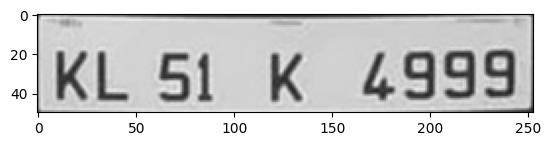

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

6.use easy OCR to read text

In [ ]:
reader= easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[0, 15], [97, 15], [97, 50], [0, 50]], 'KL 51', 0.7674493341489653),
 ([[112, 16], [144, 16], [144, 50], [112, 50]], 'K', 0.6281633231137427),
 ([[161, 13], [251, 13], [251, 50], [161, 50]], 'L9g9', 0.29285168647766113)]

7.plot the result

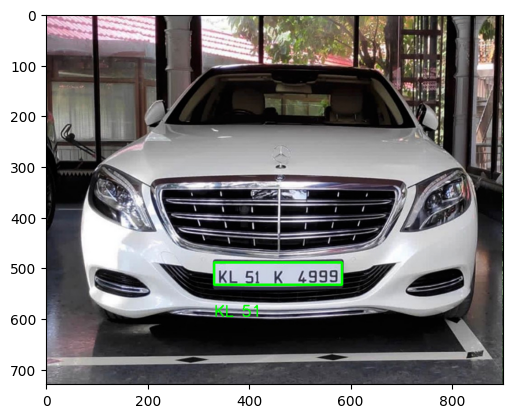

In [ ]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))